# 🧩 Bootstrap Confidence Intervals – Group Mean Estimation

In [1]:
# Setup and Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Imports
from utils.model_utils import bootstrap_groupwise_ci
from utils.visual_utils import save_and_show_plot

In [2]:
# 📁 Paths
DATA_PATH = Path("../synthetic_data")
EXPORT_PLOTS = Path("../exports/plots/common_bootstrap_ci")
EXPORT_TABLES = Path("../exports/tables/common_bootstrap_ci")
EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

In [3]:
# 📥 Load synthetic data and add group
df = pd.read_csv(DATA_PATH / "ols_data.csv")
df['group'] = ['A' if i < len(df)//2 else 'B' for i in range(len(df))]
df.head()

,X1,X2,y,group
0,5.993428,11.073362,0.847148,A
1,4.723471,11.682354,0.008497,A
2,6.295377,13.249154,2.176524,A
3,8.046060,13.161406,4.926576,A
4,4.531693,5.866992,4.015547,A


In [4]:
# 📊 Compute Bootstrap CI for each group
bootstrap_results = bootstrap_groupwise_ci(df, group_col="group", value_col="y",
                                           n_bootstrap=1000, ci=95)
display(bootstrap_results)
bootstrap_results.to_csv(EXPORT_TABLES / "bootstrap_ci_table.csv", index=False)

,Group,Mean,Lower,Upper
0,A,1.968172,1.298183,2.605902
1,B,2.169591,1.505157,2.834230


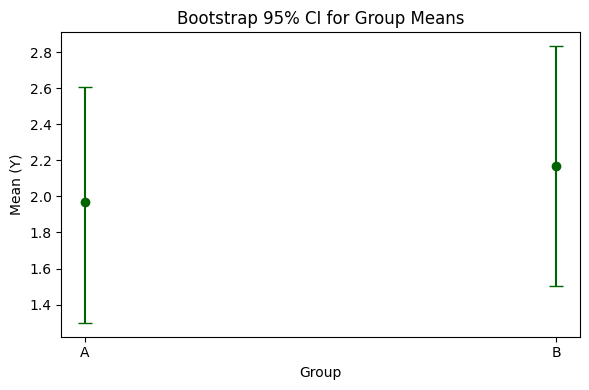

<Figure size 640x480 with 0 Axes>

In [5]:
# 📈 Plot Bootstrap CIs
plt.figure(figsize=(6, 4))

# Extract values
x = bootstrap_results['Group']
y = bootstrap_results['Mean']
yerr_lower = y - bootstrap_results['Lower']
yerr_upper = bootstrap_results['Upper'] - y
yerr = [yerr_lower, yerr_upper]

plt.errorbar(x, y, yerr=yerr, fmt='o', color='darkgreen', capsize=5)
plt.title("Bootstrap 95% CI for Group Means")
plt.ylabel("Mean (Y)")
plt.xlabel("Group")
plt.tight_layout()
save_and_show_plot("bootstrap_group_mean_ci", EXPORT_PLOTS)

save_and_show_plot("bootstrap_group_mean_ci", EXPORT_PLOTS)

## ✅ Summary:
- Performed bootstrap resampling to estimate 95% CI for each group’s mean
- Visualized CIs using Seaborn pointplot with asymmetric error bars
- Exported CI table and plot for reproducibility